# Team project task

This is my team project task.
I answered the questions in the notebook and the data is in the folder data.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---

## Q1. Descriptive analysis of data is essential for business analytics
In France, metropolis is composed of a city and its neighboring towns. Please work on the dataset,
Bordeaux_Metrople.csv and postalcode.txt
Bordeaux_Metrople.csv contains the following columns:
• date_mutation: date of transaction
• valeure_fonciere: property value
• code_postal: postal code
• section: section
• type_local: type of property (apartment or house)
• surface_relle_bati: size of property (in m2)
• number_pieces_principales: number of rooms
• surface_terrain: size of land (in m2)
In postalcode.txt, there are two columns, i.e., name of city and its postal code.

#### (A) Please write a Python code to read all postal codes and save them in a list.

In [2]:
#Using the text file
#create the list from a txt file having a csv structure
postal_code_list = np.loadtxt('data/postalcode.txt', delimiter=",", usecols=1)

#transform every element into an integer
postal_code_list = [int(x) for x in postal_code_list]

postal_code_list

[33000,
 33440,
 33810,
 33370,
 33530,
 33130,
 33290,
 33520,
 33560,
 33150,
 33320,
 33270,
 33170,
 33110,
 33185,
 33310,
 33127,
 33700,
 33600,
 33160,
 33400,
 33140]

In [3]:
#Using the Bordeaux metropolis dataset
#first create the Bordeaux metropolis housing dataset
df_bordeaux = pd.read_csv('data/Bordeaux_Metropole.csv')

#Afterward select the column code_postal and retrieve all the postal code
alter_postal_code_list = list(df_bordeaux['code_postal'].unique())
alter_postal_code_list

[33000,
 33440,
 33810,
 33370,
 33530,
 33130,
 33290,
 33520,
 33560,
 33150,
 33320,
 33270,
 33170,
 33110,
 33185,
 33310,
 33127,
 33700,
 33600,
 33160,
 33400,
 33140]

#### (B) Continue with (A). Please export descriptive statistics of price and size of apartments (i.e., mean, std, min, max, median, Q25, Q75) for every postal code (that you read in A) as a csv file (e.g., 33110.csv, 33440.csv and so on) in Bordeaux Metropole.

In [4]:
#We will use the list of postal code to loop through it
#Then we save the descriptive statistics in a csv
for item in postal_code_list:
    df_city = df_bordeaux[(df_bordeaux['code_postal']==item) & (df_bordeaux['type_local']=='Appartement')]
    df_city = df_city[['valeur_fonciere', 'surface_relle_bati']]
    df_city_stat = df_city.describe()
    df_city_stat.to_csv('data/' + str(item) + '.csv')


---

# Q2. Data analysis and Visualization
Work on TESLA daily price data, i.e., TSLA_2017_2020.xlsx, to apply a momentum as we have done in the lecture.

In [5]:
#Load the dataset and have a view on it
#to open an Excel file with pandas you should have the openpyxl package installed
df_stock_tesla = pd.read_excel('data/TSLA_2017_2020.xlsx')
df_stock_tesla.head()

,Date,ticker,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,TSLA,44.066002,42.192001,42.972000,43.397999,29616500,43.397999
1,2017-01-04,TSLA,45.599998,42.862000,42.950001,45.397999,56067500,45.397999
2,2017-01-05,TSLA,45.495998,44.389999,45.284000,45.349998,29558500,45.349998
3,2017-01-06,TSLA,46.062000,45.090000,45.386002,45.801998,27639500,45.801998
4,2017-01-09,TSLA,46.383999,45.599998,45.793999,46.256001,19897500,46.256001


In [6]:
#It is a good practice to have a look at a summary of descriptive statistics
df_stock_tesla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02,754.000000
mean,61.311923,59.249448,60.292968,60.336284,4.018381e+07,60.336284
std,9.446211,9.182663,9.324096,9.314616,2.231210e+07,9.314616
min,37.335999,35.397999,36.220001,35.793999,1.093350e+07,35.793999
25%,53.815001,51.735501,52.799999,52.680999,2.547112e+07,52.680999
50%,62.719999,60.372999,61.493999,61.733002,3.454200e+07,61.733002
75%,68.930498,66.592499,67.788498,67.625999,4.581962e+07,67.625999
max,87.061996,85.269997,87.000000,86.188004,1.682485e+08,86.188004


#### (A) For long strategy, we choose simple-moving average (SMA) pairs (i.e., 5-day SMA and 10-day SMA)
#### to analyze the trend in the stock market.
Please compute 5-day SMA and 10-day SMA of the close price sequence, plot, and labels 5-day SMA and 10-day SMA with blue and red solid curves,
respectively. Please attach the figure in the report.

In [7]:
#Using pandas rolling built-in function and check if it's the desired outcome
def long_short_rolling(long, short, df_rolling):
    df_rolling['Long SMA'] = df_rolling['Close'].rolling(window=long).mean()
    df_rolling['Short SMA'] = df_rolling['Close'].rolling(window=short).mean()

long_short_rolling(10, 5, df_stock_tesla)
df_stock_tesla.head(15)

,Date,ticker,High,Low,Open,Close,Volume,Adj Close,Long SMA,Short SMA
0,2017-01-03,TSLA,44.066002,42.192001,42.972000,43.397999,29616500,43.397999,NaN,NaN
1,2017-01-04,TSLA,45.599998,42.862000,42.950001,45.397999,56067500,45.397999,NaN,NaN
2,2017-01-05,TSLA,45.495998,44.389999,45.284000,45.349998,29558500,45.349998,NaN,NaN
3,2017-01-06,TSLA,46.062000,45.090000,45.386002,45.801998,27639500,45.801998,NaN,NaN
4,2017-01-09,TSLA,46.383999,45.599998,45.793999,46.256001,19897500,46.256001,NaN,45.240799
5,2017-01-10,TSLA,46.400002,45.377998,46.400002,45.973999,18300000,45.973999,NaN,45.755999
6,2017-01-11,TSLA,45.995998,45.335999,45.813999,45.945999,18254000,45.945999,NaN,45.865599
7,2017-01-12,TSLA,46.139999,45.116001,45.812000,45.917999,18951000,45.917999,NaN,45.979199
8,2017-01-13,TSLA,47.570000,45.917999,46.000000,47.549999,30465000,47.549999,NaN,46.328799
9,2017-01-17,TSLA,47.992001,46.874001,47.340000,47.116001,23087500,47.116001,45.870799,46.500800


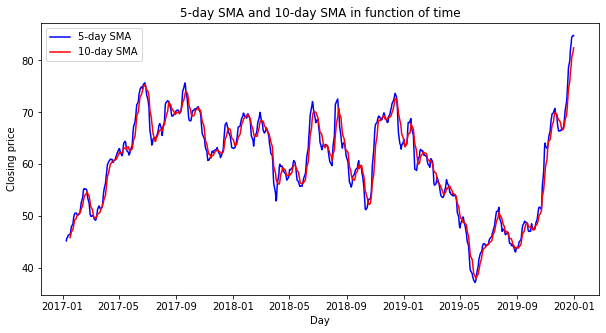

In [8]:
#Plot the figure respecting constraint of the task
#First make the figure as a rectangle due to the nature of the plot >3years in time
plt.figure(figsize=(10, 5))
plt.plot(df_stock_tesla['Date'], df_stock_tesla['Short SMA'],'b-', label='5-day SMA')
plt.plot(df_stock_tesla['Date'], df_stock_tesla['Long SMA'], 'r-', label='10-day SMA')
#add legend, axis names and a title
plt.legend()
plt.ylabel('Closing price')
plt.xlabel('Day')
plt.title('5-day SMA and 10-day SMA in function of time')
plt.show()

#### (B) If golden cross (i.e., the buying signal) occurs when 5-day SMA crosses over 10-day
#### SMA and the death cross (i.e., the selling signal) occurs when 10-day SMA crosses over 5-day SMA.
Please write a python code to simulate the revenue of this trading strategy given your trade
is executed at the next day’s open price. Please report the total number of transactions and your
average revenue that you have traded to Q3_b.xlsx.

The problem can be seen as a two state problem.
Where the shift from one state to another imply a buy or sell action.

In [9]:
#Algo 1: I tried to implement the SMA technique looking at the crossing events with conditions
#We list all transactions in a list, compute the total number of transactions,
# average revenue and the total revenue
def golden_death_cross(df_input):

    count=0
    transactions = []
    buying_list = []
    selling_list = []
    revenue = -1

    for i in range(len(df_input)):
        """taking into account the starting point without data
        if i < 10 and df_input['Short SMA'][i] > df_input['Long SMA'][i]:
            #buying signal
            buying_list.append(df_input['Open'][i+1])
            selling_list.append(np.nan)
            transactions.append(-df_input['Open'][i+1])
            count += 1
            revenue += -df_input['Open'][i+1]"""
        #Golden cross or buying signal
        if df_input['Short SMA'][i] > df_input['Long SMA'][i] and df_input['Short SMA'][i-1] < df_input['Long SMA'][i-1]:
            buying_list.append(df_input['Open'][i+1])
            selling_list.append(np.nan)
            transactions.append(-df_input['Open'][i+1])
            count+=1
            revenue += -df_input['Open'][i+1]
        #Death cross or selling signal
        elif df_input['Short SMA'][i] < df_input['Long SMA'][i] and df_input['Short SMA'][i-1] > df_input['Long SMA'][i-1] and count > 0:
            buying_list.append(np.nan)
            selling_list.append(df_input['Open'][i+1])
            transactions.append(df_input['Open'][i+1])
            count+=1
            revenue += df_input['Open'][i+1]
        #No signal
        else:
            buying_list.append(np.nan)
            selling_list.append(np.nan)
            transactions.append(np.nan)

    return {'transactions': transactions, 'buying_list': buying_list, 'selling_list': selling_list, 'average_revenue': np.nanmean(transactions), 'total_revenue': np.nansum(transactions), 'count': count, 'revenue': revenue}


result_of_transactions = golden_death_cross(df_stock_tesla)
print('The total number of transactions is: ', result_of_transactions['count'])
print('The average revenue is: ', result_of_transactions['average_revenue'])
print('The total revenue is: ', result_of_transactions['revenue'])

The total number of transactions is:  79
The average revenue is:  -0.695518976525416
The total revenue is:  -55.94599914550784


In [10]:
df_result = pd.DataFrame({'Date': df_stock_tesla['Date'], 'Buying': result_of_transactions['buying_list'], 'Selling': result_of_transactions['selling_list'],'transactions':result_of_transactions['transactions']})
#quick look at the results
df_result.describe()

,Buying,Selling,transactions
count,40.000000,39.000000,79.000000
mean,60.572500,60.716769,-0.695519
std,8.404104,8.350974,61.592333
min,41.000000,43.889999,-72.764000
25%,55.215500,55.586000,-62.118000
50%,62.118000,62.470001,-41.000000
75%,67.234001,67.364998,62.173000
max,72.764000,72.741997,72.741997


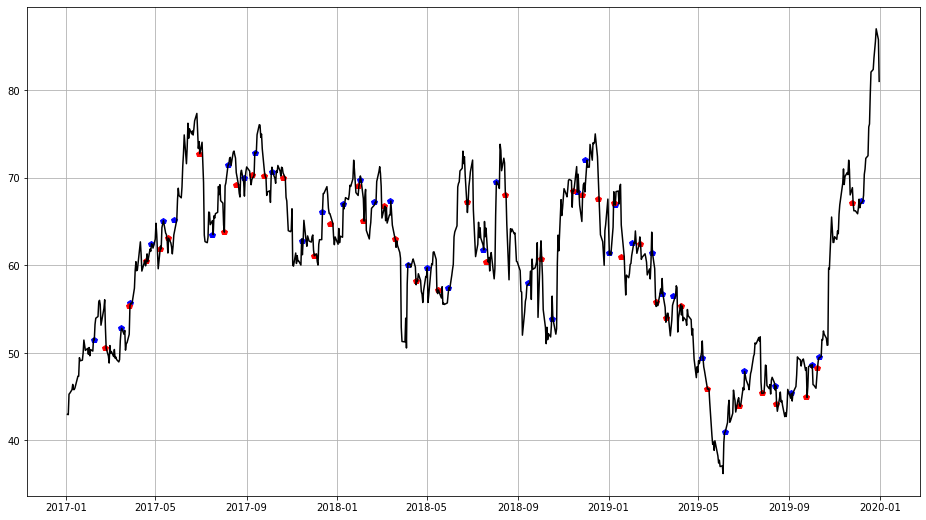

In [11]:
#Plot of the first Algo:
plt.figure(figsize=(16,9))
plt.plot(df_stock_tesla['Date'], df_result['Buying'], label='Buy signal', marker='p',color='blue')
plt.plot(df_stock_tesla['Date'], df_result['Selling'], label='Sell signal', marker='p',color='red')
plt.plot(df_stock_tesla['Date'], df_stock_tesla['Open'], label='Price', color='black')
plt.grid()
plt.title('Opening price of Tesla stock in function of time')
plt.xlabel('Days')
plt.ylabel('Open price($)')
plt.show()

##### We will use the lecture algorithm due to the poor performance of the code above.
Indeed, the code above input to the revenue the last stock bought, which is not sold.
We will see in the last question how to fix this. (selling it out of the scope of this algorithm).

In [12]:
#We compare it with the result of the strategy in the lecture
#This is the lecture Algo (we call it Algo 2), which is based on two states 
def long_position_transaction(seq):

    status = 0
    count = 0
    price_buy = []
    price_sell = []
    revenue = []
    temp_buyprice = -1

    for i in range(len(seq)):
        if seq['Short SMA'][i] > seq['Long SMA'][i]:
            #signal to buy:
            if status !=1:
                status=1
                price_buy.append(seq['Open'][i+1])
                temp_buyprice = seq['Open'][i+1]
                price_sell.append(np.nan)
                revenue.append(np.nan)
                count += 1
            else:
                price_buy.append(np.nan)
                price_sell.append(np.nan)
                revenue.append(np.nan)
        elif seq['Short SMA'][i] < seq['Long SMA'][i]:
            #signal to sell:
            if status !=0:
                status=0
                price_buy.append(np.nan)
                price_sell.append(seq['Open'][i+1])
                revenue.append(seq['Open'][i+1]-temp_buyprice)
                count += 1
            else:
                price_buy.append(np.nan)
                price_sell.append(np.nan)
                revenue.append(np.nan)
        else:
            price_buy.append(np.nan)
            price_sell.append(np.nan)
            revenue.append(np.nan)

    return price_buy, price_sell, revenue, count

alter_result = long_position_transaction(df_stock_tesla)

df_summary_alter_results = pd.DataFrame([alter_result[3], np.nanmean(alter_result[2]), np.nansum(alter_result[2])], index=['The total number of transactions is:', 'The average revenue is:', 'The total revenue is:'])

df_summary_alter_results.to_excel('data/Q3_b.xlsx')

df_summary_alter_results

,0
The total number of transactions is:,81.000000
The average revenue is:,0.381050
The total revenue is:,15.242001


#### (C) Continue with (B) Please visualize the strategy over 3 years in a graph.
Where the black solid line is used for the open price sequence with a blue pentagon for golden cross (buy) and red
pentagon for death cross (sell), respectively. Please attach the figure in the report.

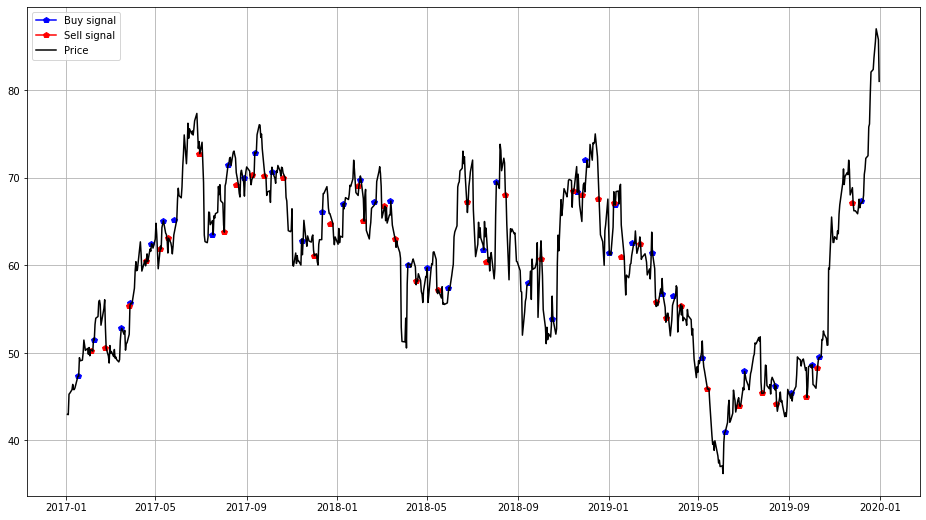

In [13]:
df_alter_result = pd.DataFrame({'Date': df_stock_tesla['Date'],'PriceBuy': alter_result[0], 'PriceSell': alter_result[1], 'Revenue': alter_result[2]})

#Plot of the data
plt.figure(figsize=(16,9))
plt.plot(df_stock_tesla['Date'], df_alter_result['PriceBuy'], label='Buy signal', marker='p',color='blue')
plt.plot(df_stock_tesla['Date'], df_alter_result['PriceSell'], label='Sell signal', marker='p',color='red')
plt.plot(df_stock_tesla['Date'], df_stock_tesla['Open'], label='Price', color='black')
plt.grid()
plt.legend()
plt.xlabel('Days')
plt.ylabel('Open price($)')
plt.title('Opening price of Tesla stock in function of time')
plt.show()

#### (D) Compare the simple-moving average (SMA) pairs you worked in (B), i.e., 5-day SMA
#### and 10-day SMA with another simple-moving average (SMA) pairs of 5-day SMA and 20-day SMA.
Please indicate which one is the better strategy in average revenue. Please provide the
evidence in your report for these two trading pairs.

In [14]:
#Computing the very long window of 20 days
df_stock_tesla['Very long SMA'] = df_stock_tesla['Close'].rolling(window=20).mean()
df_stock_tesla

,Date,ticker,High,Low,Open,Close,Volume,Adj Close,Long SMA,Short SMA,Very long SMA
0,2017-01-03,TSLA,44.066002,42.192001,42.972000,43.397999,29616500,43.397999,NaN,NaN,NaN
1,2017-01-04,TSLA,45.599998,42.862000,42.950001,45.397999,56067500,45.397999,NaN,NaN,NaN
2,2017-01-05,TSLA,45.495998,44.389999,45.284000,45.349998,29558500,45.349998,NaN,NaN,NaN
3,2017-01-06,TSLA,46.062000,45.090000,45.386002,45.801998,27639500,45.801998,NaN,NaN,NaN
4,2017-01-09,TSLA,46.383999,45.599998,45.793999,46.256001,19897500,46.256001,NaN,45.240799,NaN
...,...,...,...,...,...,...,...,...,...,...,...
749,2019-12-24,TSLA,85.094002,82.538002,83.671997,85.050003,40273500,85.050003,77.5702,81.889999,72.273899
750,2019-12-26,TSLA,86.695999,85.269997,85.582001,86.188004,53169500,86.188004,79.1350,83.401601,73.294100
751,2019-12-27,TSLA,87.061996,85.222000,87.000000,86.075996,49728500,86.075996,80.5490,84.455200,74.284999
752,2019-12-30,TSLA,85.800003,81.851997,85.758003,82.940002,62932000,82.940002,81.6752,84.819601,75.132600


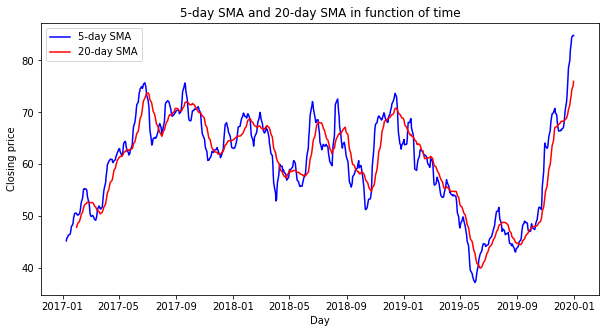

In [15]:
#Quick plot
plt.figure(figsize=(10, 5))
plt.plot(df_stock_tesla['Date'], df_stock_tesla['Short SMA'],'b-', label='5-day SMA')
plt.plot(df_stock_tesla['Date'], df_stock_tesla['Very long SMA'], 'r-', label='20-day SMA')
plt.legend()
plt.ylabel('Closing price($)')
plt.xlabel('Day')
plt.title('5-day SMA and 20-day SMA in function of time')
plt.show()

In [16]:
#Computing the very long window of 20 days with my own algorithm
def golden_death_cross_2(df_input):

    count=0
    transactions = []
    buying_list = []
    selling_list = []
    revenue = -1

    for i in range(len(df_input)):
        """taking into account the starting point without data
        if i < 10 and df_input['Short SMA'][i] > df_input['Long SMA'][i]:
            #buying signal
            buying_list.append(df_input['Open'][i+1])
            selling_list.append(np.nan)
            transactions.append(-df_input['Open'][i+1])
            count += 1
            revenue += -df_input['Open'][i+1]"""
        #Golden cross or buying signal
        if df_input['Short SMA'][i] > df_input['Very long SMA'][i] and df_input['Short SMA'][i-1] < df_input['Very long SMA'][i-1]:
            buying_list.append(df_input['Open'][i+1])
            selling_list.append(np.nan)
            transactions.append(-df_input['Open'][i+1])
            count+=1
            revenue += -df_input['Open'][i+1]
        #Death cross or selling signal
        elif df_input['Short SMA'][i] < df_input['Very long SMA'][i] and df_input['Short SMA'][i-1] > df_input['Very long SMA'][i-1] and count > 0:
            buying_list.append(np.nan)
            selling_list.append(df_input['Open'][i+1])
            transactions.append(df_input['Open'][i+1])
            count+=1
            revenue += df_input['Open'][i+1]
        #No signal
        else:
            buying_list.append(np.nan)
            selling_list.append(np.nan)
            transactions.append(np.nan)

    return {'transactions': transactions, 'buying_list': buying_list, 'selling_list': selling_list, 'average_revenue': np.nanmean(transactions), 'total_revenue': np.nansum(transactions), 'count': count, 'revenue': revenue}


result_of_transactions_VL = golden_death_cross_2(df_stock_tesla)
print('The total number of transactions is: ', result_of_transactions_VL['count'])
print('The average revenue is: ', result_of_transactions_VL['average_revenue'])
print('The total revenue is: ', result_of_transactions_VL['revenue'])

The total number of transactions is:  49
The average revenue is:  -1.579183850969587
The total revenue is:  -78.38000869750977


In [17]:
#Computing the very long window of 20 days with the algorithm from the lecture
def long_position_transaction20(seq):

    status = 0
    count = 0
    price_buy = []
    price_sell = []
    revenue = []
    temp_buyprice = -1

    for i in range(len(seq)):
        if seq['Short SMA'][i] > seq['Very long SMA'][i]:
            #signal to buy:
            if status !=1:
                status=1
                price_buy.append(seq['Open'][i+1])
                temp_buyprice = seq['Open'][i+1]
                price_sell.append(np.nan)
                revenue.append(np.nan)
                count += 1
            else:
                price_buy.append(np.nan)
                price_sell.append(np.nan)
                revenue.append(np.nan)
        elif seq['Short SMA'][i] < seq['Very long SMA'][i]:
            #signal to sell:
            if status !=0:
                status=0
                price_buy.append(np.nan)
                price_sell.append(seq['Open'][i+1])
                revenue.append(seq['Open'][i+1]-temp_buyprice)
                count += 1
            else:
                price_buy.append(np.nan)
                price_sell.append(np.nan)
                revenue.append(np.nan)
        else:
            price_buy.append(np.nan)
            price_sell.append(np.nan)
            revenue.append(np.nan)

    return price_buy, price_sell, revenue, count

alter_result2 = long_position_transaction20(df_stock_tesla)

df_summary_alter_results2 = pd.DataFrame([alter_result2[3], np.nanmean(alter_result2[2]), np.nansum(alter_result2[2])], index=['The total number of transactions is:', 'The average revenue is:', 'The total revenue is:'])

df_summary_alter_results2

,0
The total number of transactions is:,51.000000
The average revenue is:,-0.277680
The total revenue is:,-6.942009


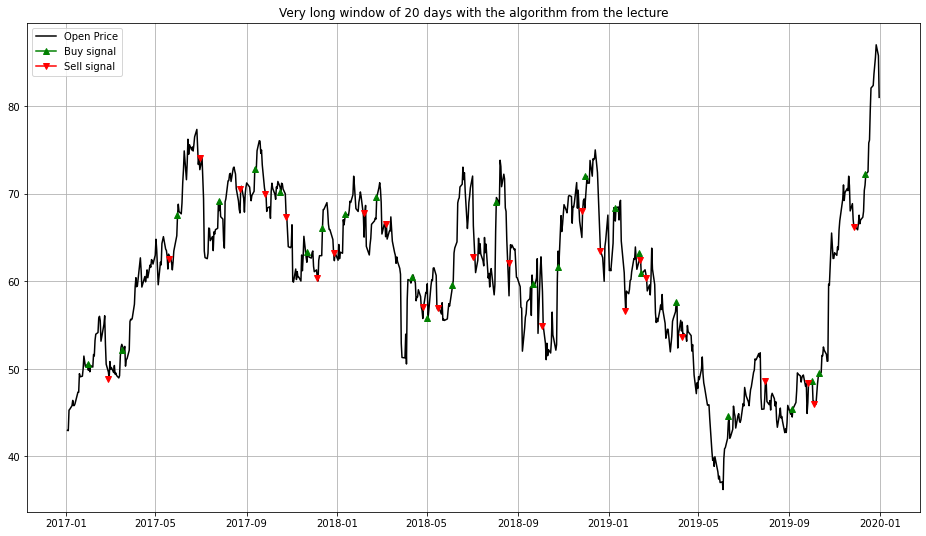

In [18]:
df_alter_result2 = pd.DataFrame({'Date': df_stock_tesla['Date'],'PriceBuy': alter_result2[0], 'PriceSell': alter_result2[1], 'Revenue': alter_result2[2]})

#plot of the very long window of 20 days with the algorithm from the lecture
plt.figure(figsize=(16,9))
plt.plot(df_stock_tesla['Date'],df_stock_tesla['Open'], label='Open Price', color='black')
plt.plot(df_stock_tesla['Date'], df_alter_result2['PriceBuy'], label='Buy signal', marker='^',color='green')
plt.plot(df_stock_tesla['Date'], df_alter_result2['PriceSell'], label='Sell signal', marker='v',color='red')
plt.grid()
plt.legend()
plt.title('Very long window of 20 days with the algorithm from the lecture')
plt.ylabel('Open price ($)')
plt.xlabel('Days')
plt.show()

Comparing the results of the very long window of 20 days with the algorithm from the lecture
with the results of the long window of 10 days with the algorithm from the lecture,
shows us that the 5-day and 10-day rolling are the best fits for this stock.
Indeed, it is the only one that has a positive revenue at the end of the 3 years interval.

If we compare with the algorithm done by myself, we can see that the very long window of 20 days
is still the worst setup.

We can suppose that the very long window do not enable fast response to the market.
Which in this case is crucial.

#### (E) Continue with (B) Write a python to close your position at the end of the trading period,
#### that is, sell all your stocks at the best price for closing your position.
Please export your accumulated revenue to Q3_e.xlsx.

Because we are in the 5-day and 10 day rolling, we can wait until 10 days if our 5 day is not changing his slope.
Otherwise, we sell instantly if the slope is changing.

This implementation is important, because it will make my own algorithm comparable to the one of the lecture.

In [19]:
df_result.tail(20)
#In the case of my algo we just need to find a strategy for selling the last stock.

,Date,Buying,Selling,transactions
734,2019-12-03,NaN,NaN,NaN
735,2019-12-04,NaN,NaN,NaN
736,2019-12-05,NaN,NaN,NaN
737,2019-12-06,67.318001,NaN,-67.318001
738,2019-12-09,NaN,NaN,NaN
739,2019-12-10,NaN,NaN,NaN
740,2019-12-11,NaN,NaN,NaN
741,2019-12-12,NaN,NaN,NaN
742,2019-12-13,NaN,NaN,NaN
743,2019-12-16,NaN,NaN,NaN


In [20]:
df_alter_result.tail(20)
#For the second case we should not forget the buying price of the last stock that haven't been deduced from the revenue.

,Date,PriceBuy,PriceSell,Revenue
734,2019-12-03,NaN,NaN,NaN
735,2019-12-04,NaN,NaN,NaN
736,2019-12-05,NaN,NaN,NaN
737,2019-12-06,67.318001,NaN,NaN
738,2019-12-09,NaN,NaN,NaN
739,2019-12-10,NaN,NaN,NaN
740,2019-12-11,NaN,NaN,NaN
741,2019-12-12,NaN,NaN,NaN
742,2019-12-13,NaN,NaN,NaN
743,2019-12-16,NaN,NaN,NaN


Calculation of the revenue before selling our last stock:
Algo 1 revenue : -55.0

for the second algo we should take into account the buying price of the last stock that haven't been deduced from the revenue.

Algo 2 revenue : 15.0 - 72.0 = -57.0

Both algorithms have around the same revenue before selling the last stock.
Showing that my algorithm is as good as the one from the lecture.

We will the date of 2019-12-12 for the last stock bought.
we know that the best-selling stock is 87, we should find a technique to arrive near it.

The first step is to calculate the revenue if we sell instantly our stock. It will the risk averse option, and the worst in any scenario.

In [21]:
#if we sell instantly, on 2019-12-12 we will have a revenue of:
price_instant = df_stock_tesla['Open'][df_stock_tesla['Date']=='2019-12-12'].values[0]
print('For algo 1 the revenue is:', price_instant - 55 )
print('For algo 2 the revenue is:', price_instant - 57 )

For algo 1 the revenue is: 15.984001159667969
For algo 2 the revenue is: 13.984001159667969


With the maximum and minimum of profit that our algorithm should generate we are able to assess the performance of different ideas of algorithms.

Maybe the use of approximation of derivative could help us to identify a modification in the trends.
My hypothesis is that a change in the variation of the price could be an indicator of a change in the market.
Using the second derivative help us to grasp the nature of the shift in the price.


$\frac{\partial Price^{2}}{\partial t^{2}}$


In [22]:
#we compute the approximation of the first derivative
df_stock_tesla['delta'] = df_stock_tesla['Close'].diff()

df_delta_stock_tesla = pd.DataFrame({'Date': df_stock_tesla['Date'], 'Open':df_stock_tesla['Open'],'delta': df_stock_tesla['delta']})

#we compute the approximation of the second derivative to know the variation of the variation
df_delta_stock_tesla['delta_2'] = df_delta_stock_tesla['delta'].diff()
df_delta_last20 = df_delta_stock_tesla.tail(20)
df_delta_last20 = df_delta_last20.reset_index()
df_delta_last20

,index,Date,Open,delta,delta_2
0,734,2019-12-03,66.524002,0.265999,-0.720001
1,735,2019-12-04,67.550003,-0.633995,-0.899994
2,736,2019-12-05,66.566002,-0.532005,0.101990
3,737,2019-12-06,67.000000,1.104004,1.636009
4,738,2019-12-09,67.318001,0.727997,-0.376007
5,739,2019-12-10,67.991997,1.862000,1.134003
6,740,2019-12-11,70.375999,0.772003,-1.089996
7,741,2019-12-12,70.984001,1.395996,0.623993
8,742,2019-12-13,72.209999,-0.257996,-1.653992
9,743,2019-12-16,72.510002,4.622002,4.879997


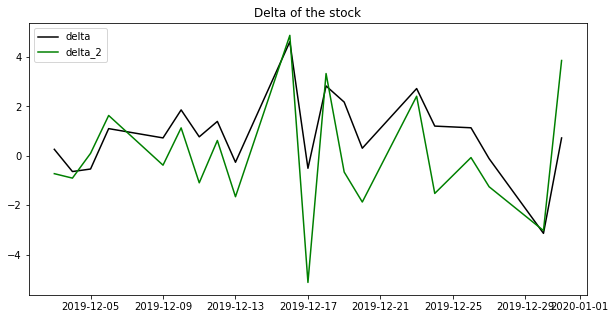

In [23]:
#plot the delta of the stock
plt.figure(figsize=(10,5))
plt.plot(df_stock_tesla['Date'].tail(20), df_stock_tesla['delta'].tail(20), label='delta', color='black')
plt.plot(df_stock_tesla['Date'].tail(20), df_delta_stock_tesla['delta_2'].tail(20), label='delta_2', color='green')
plt.legend()
plt.title('Delta of the stock')
plt.show()

In [24]:
#we will filter the days when the delta is changing his slope from positive to negative
#And we will sell the stock on the last day of the delta changing his slope from positive to negative

#we will call this method the derivative one
for i in range(7, len(df_delta_last20)):
    if df_delta_last20.iloc[i]['delta'] < 0 :
        print('You should sell today :', df_delta_last20.iloc[i]['Date'])
        print('at the price of :', df_delta_last20.iloc[i]['Open'])
        break


You should sell today : 2019-12-13 00:00:00
at the price of : 72.20999908447266


Another option could be to look at the maximum for a window of 5 days,
 if the derivative is increasing for more than 5 we can sell.

In [25]:
#We can also decide that if the new entry is a max for the last 10 days we sell.
#we will call it max_method
max_day = 0
counter =0
for i in range(len(df_delta_last20)):
    a = df_delta_last20.iloc[i]['delta']
    if a > max_day:
        max_day = a
        counter = 0
    elif counter >= 5:
        print('You should sell today at:',df_delta_last20.iloc[i]['Open'])
        break
    else:
        counter += 1

You should sell today at: 83.6719970703125


In [26]:
#create the dict of final revenue:
df_final_revenue = pd.DataFrame({'Instant':[15,13],'Delta method': [72-55,72-57], 'Max method': [83-55,83-57], 'Max possible revenue':[87-55,87-57]}, index=['Algo1', 'Algo2'])
df_final_revenue

,Instant,Delta method,Max method,Max possible revenue
Algo1,15,17,28,32
Algo2,13,15,26,30


This table summarizes our experiment and show that we found ways of being really near the maximum stock price for the period. Indeed, the max_method that we created enable us to be at 87 percent of the maximum revenue.

Both methods were based on derivative but the last one looks more optimal for this case, but both are better than nothing.

In [27]:
#Final export of the results:
df_final_revenue.to_excel('data/Q3_e.xlsx')